# <font size=6><b> Object 변수

* 범주형 변수 categorical data 처리
    * 라벨인코딩(Label Encoding)
    * 원핫인코딩(One-hot Encoding)
    * get_dummies()
    * 범주화(Bining)
    * df['컬럼명'].astype('category')

##  <font size=4><b>(1) 라벨인코딩(Label Encoding)
> * n개의 범주형 데이터를 0부터 n-1까지의 연속적 수치 데이터로 표현

In [ ]:
# 설치를 위해 pip 버전 2.30이상 필요
# pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import LabelEncoder

In [4]:
# 샘플 데이터 프레임
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],
                   "score": ["A","B",np.nan,"A","C"]})
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [6]:
le = LabelEncoder() # 클래스() ==> 생성자 함수라고 함 : 모든 객체를 메모리에 넣는 역할
le.fit(df['name']) # distinct
res = le.transform(df['name'])
print(df['name'].values)
print(res) # a-z사전순으로 숫자로 변환해줌

['smith' 'martin' 'jones' 'allen' 'king']
[4 3 1 0 2]


In [7]:
le = LabelEncoder() # 클래스() ==> 생성자 함수라고 함 : 모든 객체를 메모리에 넣는 역할
le.fit(df['score']) # distinct
res = le.transform(df['score'])
print(df['score'].values)
print(res)

['A' 'B' nan 'A' 'C']
[0 1 3 0 2]


In [13]:
df['le_name'] = res
df

,name,score,scor_arr,le_name
0,smith,A,0,0
1,martin,B,1,1
2,jones,NaN,3,3
3,allen,A,0,0
4,king,C,2,2


## <font size=4><b>(2) 원핫인코딩(One-hot Encoding)
> * 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 벡터 표현 방식
> *  데이터프레임에서 object 타입으로 되어있는 변수는 dummy 변수화
> * <font color=red><b> 판다스의 시리즈가 아닌 numpy 행렬을 입력해야함 → df['컬럼'].values
> * <font color=red><b> 벡터 입력을 허용하지 않음 → reshape(-1,1) (: -1은 몇이여도 상관 없다는 뜻)을 이용해 Matrix로 변환  (N,):1차원 → (N,1) : 2차원

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
df['score'].values

array(['A', 'B', nan, 'A', 'C'], dtype=object)

In [22]:
df['score'].shape  # array의 요소값이 5개인 series

(5,)

In [28]:
df['score'].values.reshape(-1,1) # -1 : 몇 행이여도 상관 없음 

array([['A'],
       ['B'],
       [nan],
       ['A'],
       ['C']], dtype=object)

In [31]:
oe = OneHotEncoder(sparse=False)
oe.fit(df['score'].values.reshape(-1,1)) # 반드시 2차의 metrics를 넣어야함
res = oe.transform(df['score'].values.reshape(-1,1))
print(res)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [39]:
oe.categories_[0]

array(['A', 'B', 'C', nan], dtype=object)

In [40]:
DATA = pd.DataFrame(res,columns = oe.categories_[0])
DATA

,A,B,C,NaN
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [41]:
totdf = pd.concat([df,DATA], axis = 1)
totdf

,name,score,scor_arr,le_name,A,B,C,NaN
0,smith,A,0,0,1.0,0.0,0.0,0.0
1,martin,B,1,1,0.0,1.0,0.0,0.0
2,jones,NaN,3,3,0.0,0.0,0.0,1.0
3,allen,A,0,0,1.0,0.0,0.0,0.0
4,king,C,2,2,0.0,0.0,1.0,0.0


## <font size=4><b>(3) get_dummies() = 라벨인코딩(Label Encoding)+원핫인코딩(One-hot Encoding)

In [43]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],
                   "score": ["A","B",np.nan,"A","C"]})
df

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [44]:
ddf = pd.get_dummies(df)
ddf

,name_allen,name_jones,name_king,name_martin,name_smith,score_A,score_B,score_C
0,0,0,0,0,1,1,0,0
1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1


## <font size=4><b>(4) 범주화(Bining)
> * 연속형 데이터를 구간으로 나누어 범주화하는 방법
> * pd.cut()  : 동일 구간으로 나누기
> * pd.qcut() : 동일 갯수로 나누기

### pd.cut()

* 구간을 갯수에 상관없이 동일 간격으로 나눠줌

* 정규 분포도를 따르는 랜덤성 데이터 생성
<pre>
np.random.normal(loc=0.0, scale=1.0, size=None)


In [83]:
# seed를 정하면 하나의 값만 나옴
# np.random.seed(789)
ndata = np.random.normal(size = 200)

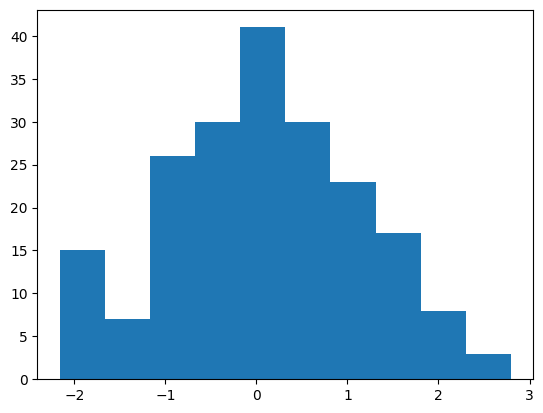

In [84]:
import matplotlib.pyplot as plt
plt.hist(ndata)
plt.show()

In [90]:
cutdata = pd.cut(ndata,5)
cutdata.describe()

,counts,freqs
categories,,
"(-2.162, -1.167]",22,0.110
"(-1.167, -0.177]",56,0.280
"(-0.177, 0.814]",71,0.355
"(0.814, 1.804]",40,0.200
"(1.804, 2.794]",11,0.055


In [97]:
cutdata.value_counts()

(-2.162, -1.167]    22
(-1.167, -0.177]    56
(-0.177, 0.814]     71
(0.814, 1.804]      40
(1.804, 2.794]      11
dtype: int64

In [92]:
my_range = [0,3,7,10]
res = pd.cut([1,2,3,4,5,6,7,8,9,10], my_range, labels = ['대','중','소'])
res.describe()

,counts,freqs
categories,,
대,3,0.3
중,4,0.4
소,3,0.3


### pd.qcut()

* 구간을 간격에 상관없이 동일 갯수로 나눠줌

In [95]:
qdata = pd.qcut(ndata,5)
qdata.describe()

,counts,freqs
categories,,
"(-2.158, -0.755]",40,0.2
"(-0.755, -0.153]",40,0.2
"(-0.153, 0.329]",40,0.2
"(0.329, 0.98]",40,0.2
"(0.98, 2.794]",40,0.2


In [96]:
qdata = pd.qcut(ndata,5,labels = [0,1,2,3,4])
qdata.describe()

,counts,freqs
categories,,
0,40,0.2
1,40,0.2
2,40,0.2
3,40,0.2
4,40,0.2


## <font size=4><b>(5) category타입
> * df['컬럼'].astype('category').cat.codes
> * df['컬럼'].astype('category').cat.categories

In [98]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],
                   "score": ["A","B",np.nan,"A","C"]})
df

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [99]:
df['name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5 entries, 0 to 4
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
5 non-null      object
dtypes: object(1)
memory usage: 168.0+ bytes


In [100]:
df['name'] = df['name'].astype('category')
df['name'].info

<bound method Series.info of 0     smith
1    martin
2     jones
3     allen
4      king
Name: name, dtype: category
Categories (5, object): ['allen', 'jones', 'king', 'martin', 'smith']>

In [102]:
# 눈으로 볼때는 같아 보이지만 카테고리 코드를 보면 숫자로 나옴
df['name'].cat.codes

0    4
1    3
2    1
3    0
4    2
dtype: int8

In [103]:
df['name_cat_codes'] = df['name'].cat.codes

In [104]:
df

,name,score,name_cat_codes
0,smith,A,4
1,martin,B,3
2,jones,NaN,1
3,allen,A,0
4,king,C,2


In [106]:
df['name'].cat.categories

Index(['allen', 'jones', 'king', 'martin', 'smith'], dtype='object')

In [108]:
d = dict(enumerate(df['name'].cat.categories))
d

{0: 'allen', 1: 'jones', 2: 'king', 3: 'martin', 4: 'smith'}

In [111]:
df['name_cat_categories'] = df['name_cat_codes'].map(d)
df

,name,score,name_cat_codes,name_cat_categories
0,smith,A,4,smith
1,martin,B,3,martin
2,jones,NaN,1,jones
3,allen,A,0,allen
4,king,C,2,king


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 5 non-null      category
 1   score                4 non-null      object  
 2   name_cat_codes       5 non-null      int8    
 3   name_cat_categories  5 non-null      object  
dtypes: category(1), int8(1), object(2)
memory usage: 430.0+ bytes
